# Victorian Water Quality 

### Setting up library

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [341]:
#Loading data
df_original = pd.read_excel('Average_data_VIC.xlsx')
df_original

,Site,EC,TSS,NOx,TKN,TP,FRP,AnnRain,AnnTemp,NDVI,AnnRun,Mean_Elevation,MeanCatSlope,PerUrbanized,PerRoadUse,PerAgri,PerPasture,PerCropping,PerHorticulture
0,221207,43.428192,3.832168,0.273339,0.172028,0.014892,0.004306,1282.753,10.165,0.832104,236.115066,693.307068,11.755544,0.000000,0.020500,0.000000,1.256367,0.000000,0.000000
1,221212,79.871050,8.247557,0.187505,0.214933,0.018003,0.003495,1162.267,11.477,0.821512,187.899524,461.113708,9.753612,0.033010,0.223259,1.503673,3.205146,0.000000,0.000000
2,222202,90.118371,4.149837,0.170078,0.189000,0.013647,0.003630,1063.573,11.539,0.799738,156.339112,450.472382,9.820712,0.002364,0.249316,0.153720,0.364357,0.000000,0.000000
3,222217,82.827063,3.335849,0.117590,0.235637,0.012789,0.003170,997.005,11.038,0.788872,108.440161,547.206909,9.477592,0.000000,0.010674,0.000000,0.000000,0.000000,0.000000
4,223202,223.135654,25.319355,0.042529,0.323300,0.035974,0.004912,822.282,9.966,0.658965,177.680538,814.375671,10.429614,0.065318,0.338870,19.488563,24.780724,0.350244,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,407255,1142.503173,18.283465,1.158684,1.627004,0.772795,0.511013,532.155,13.793,0.498724,45.037657,216.882309,1.381283,29.075836,0.743153,12.097529,13.757689,0.577699,0.000000
98,408200,8087.656032,34.714754,0.038118,1.515367,0.088033,0.005684,537.320,13.539,0.492029,48.965295,253.070892,1.758232,1.854396,0.406164,79.822524,61.004072,16.330826,0.177507
99,415200,1211.331303,20.495114,0.052980,1.023826,0.054283,0.004840,583.895,13.260,0.523873,45.083268,258.890472,2.322738,0.651750,2.405861,68.724586,51.216270,17.717100,0.036380
100,415201,1992.568563,20.919861,0.068606,0.862195,0.041143,0.003987,596.157,13.013,0.527191,72.895484,302.223969,2.647330,0.229943,2.711319,80.495227,71.989559,8.395929,0.082957


In [342]:
variables = {
    "Site": "Sampling site or location identifier",
    "EC": "Electrical Conductivity (measure of water salinity)",
    "TSS": "Total Suspended Solids (measure of particulate matter in water)",
    "NOx": "Nitrogen Oxides (indicator of nitrogen pollution)",
    "TKN": "Total Kjeldahl Nitrogen (measure of organic nitrogen and ammonia in water)",
    "TP": "Total Phosphorus (indicator of phosphorus levels in water)",
    "FRP": "Filterable Reactive Phosphorus (measure of bioavailable phosphorus)",
    "AnnRain": "Annual Rainfall (total precipitation over a year, in mm)",
    "AnnTemp": "Annual Temperature (average temperature over a year, in °C)",
    "NDVI": "Normalized Difference Vegetation Index (measure of vegetation health)",
    "AnnRun": "Annual Runoff (volume of water runoff per year, in mm or m³)",
    "Mean_Elevation": "Mean Elevation (average height above sea level, in meters)",
    "MeanCatSlope": "Mean Catchment Slope (average slope of the catchment area, in degrees or percentage)",
    "PerUrbanized": "Percentage of Urbanized Land (proportion of urban land in the area, in %)",
    "PerRoadUse": "Percentage of Land Used for Roads (proportion of land occupied by roads, in %)",
    "PerAgri": "Percentage of Agricultural Land (proportion of land used for agriculture, in %)",
    "PerPasture": "Percentage of Pasture Land (proportion of land used for grazing, in %)",
    "PerCropping": "Percentage of Land Used for Cropping (proportion of land used for growing crops, in %)",
    "PerHorticulture": "Percentage of Horticultural Land (proportion of land used for horticulture, in %)"
}


In [343]:
# strip the leading and trailing white spaces
df_original.columns=df_original.columns.str.strip()

In [344]:
df_original.head()

,Site,EC,TSS,NOx,TKN,TP,FRP,AnnRain,AnnTemp,NDVI,AnnRun,Mean_Elevation,MeanCatSlope,PerUrbanized,PerRoadUse,PerAgri,PerPasture,PerCropping,PerHorticulture
0,221207,43.428192,3.832168,0.273339,0.172028,0.014892,0.004306,1282.753,10.165,0.832104,236.115066,693.307068,11.755544,0.000000,0.020500,0.000000,1.256367,0.000000,0.0
1,221212,79.871050,8.247557,0.187505,0.214933,0.018003,0.003495,1162.267,11.477,0.821512,187.899524,461.113708,9.753612,0.033010,0.223259,1.503673,3.205146,0.000000,0.0
2,222202,90.118371,4.149837,0.170078,0.189000,0.013647,0.003630,1063.573,11.539,0.799738,156.339112,450.472382,9.820712,0.002364,0.249316,0.153720,0.364357,0.000000,0.0
3,222217,82.827063,3.335849,0.117590,0.235637,0.012789,0.003170,997.005,11.038,0.788872,108.440161,547.206909,9.477592,0.000000,0.010674,0.000000,0.000000,0.000000,0.0
4,223202,223.135654,25.319355,0.042529,0.323300,0.035974,0.004912,822.282,9.966,0.658965,177.680538,814.375671,10.429614,0.065318,0.338870,19.488563,24.780724,0.350244,0.0


In [345]:
df_original.isna().sum() # checking for null values

Site               0
EC                 0
TSS                0
NOx                0
TKN                0
TP                 0
FRP                0
AnnRain            0
AnnTemp            0
NDVI               0
AnnRun             0
Mean_Elevation     0
MeanCatSlope       0
PerUrbanized       0
PerRoadUse         0
PerAgri            0
PerPasture         0
PerCropping        0
PerHorticulture    0
dtype: int64

In [346]:
df_original.describe()

,Site,EC,TSS,NOx,TKN,TP,FRP,AnnRain,AnnTemp,NDVI,AnnRun,Mean_Elevation,MeanCatSlope,PerUrbanized,PerRoadUse,PerAgri,PerPasture,PerCropping,PerHorticulture
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,307862.127451,905.195343,13.793022,0.236438,0.598360,0.067984,0.022096,999.415559,11.546961,0.682855,278.410542,484.665410,6.420213,0.965884,1.893816,42.825195,35.167022,4.170737,0.158043
std,87105.405431,1489.533109,14.686225,0.432596,0.417447,0.097650,0.064879,302.824505,1.376632,0.087038,201.305952,282.457372,4.438429,3.167411,1.534368,33.320401,28.932196,6.766637,0.705392
min,221207.000000,22.180122,2.228464,0.014550,0.090615,0.008283,0.002951,532.155000,7.644000,0.487905,18.702043,69.393646,0.448998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,232200.500000,71.027897,7.080985,0.077477,0.233507,0.021342,0.004021,740.819500,10.786000,0.617372,120.296709,256.584694,2.596470,0.004179,0.753276,6.084670,3.162419,0.000000,0.000000
50%,237203.500000,205.620457,10.552370,0.122640,0.531099,0.038706,0.005893,971.808500,11.863500,0.695195,203.274389,426.072388,5.680066,0.187793,1.628607,45.621399,37.269001,0.376766,0.000000
75%,405202.250000,1137.560455,15.008715,0.244496,0.875656,0.079087,0.013230,1183.069750,12.564000,0.738850,433.408073,655.817017,9.442328,0.679542,2.659139,75.623462,60.176528,5.527532,0.081109
max,415207.000000,8087.656032,115.109966,3.538936,1.855543,0.772795,0.511013,1821.554000,13.793000,0.843394,927.036769,1313.285767,18.808178,29.075836,6.978975,98.589584,90.825784,29.873088,6.839944


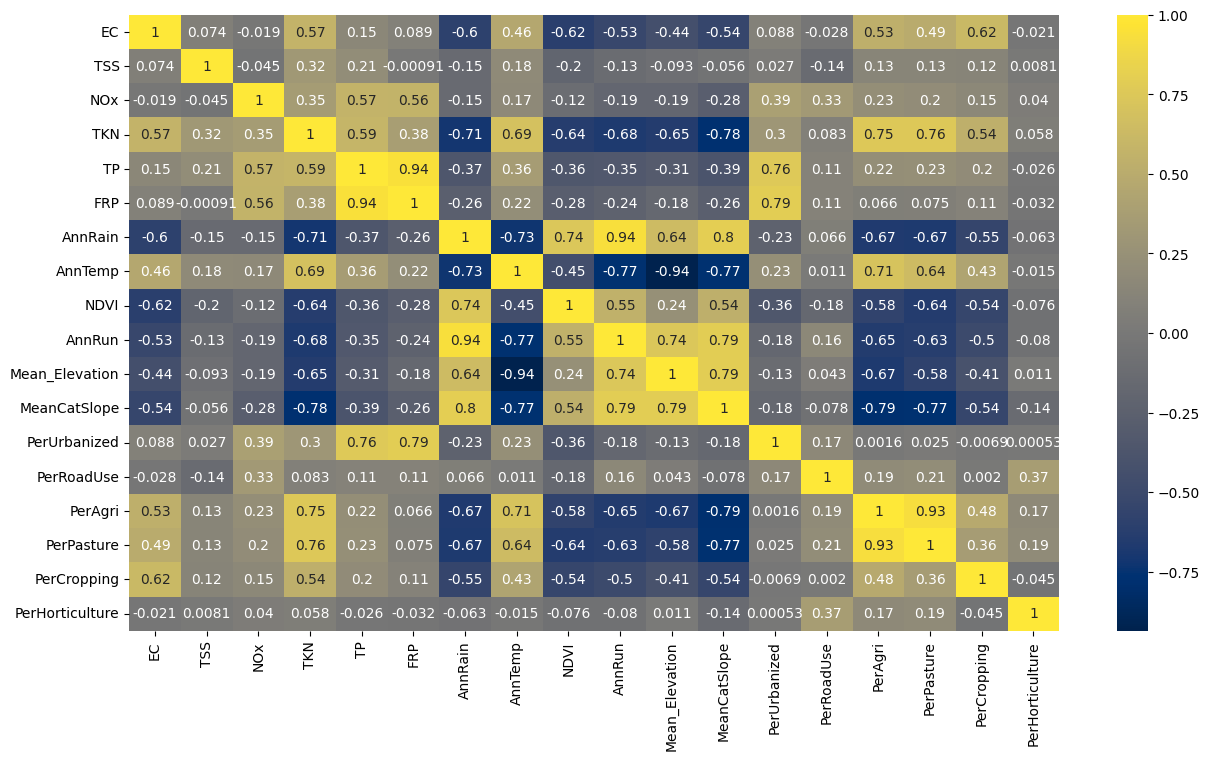

In [347]:
# plotting the correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_original.iloc[:,1:].corr(),annot=True,cmap="cividis");

**We can see that there are som linear dependancies between  the variables and we are dopping the first column (site)**

In [348]:
df=df_original.drop(["Site"],axis=1)
df.head()

,EC,TSS,NOx,TKN,TP,FRP,AnnRain,AnnTemp,NDVI,AnnRun,Mean_Elevation,MeanCatSlope,PerUrbanized,PerRoadUse,PerAgri,PerPasture,PerCropping,PerHorticulture
0,43.428192,3.832168,0.273339,0.172028,0.014892,0.004306,1282.753,10.165,0.832104,236.115066,693.307068,11.755544,0.000000,0.020500,0.000000,1.256367,0.000000,0.0
1,79.871050,8.247557,0.187505,0.214933,0.018003,0.003495,1162.267,11.477,0.821512,187.899524,461.113708,9.753612,0.033010,0.223259,1.503673,3.205146,0.000000,0.0
2,90.118371,4.149837,0.170078,0.189000,0.013647,0.003630,1063.573,11.539,0.799738,156.339112,450.472382,9.820712,0.002364,0.249316,0.153720,0.364357,0.000000,0.0
3,82.827063,3.335849,0.117590,0.235637,0.012789,0.003170,997.005,11.038,0.788872,108.440161,547.206909,9.477592,0.000000,0.010674,0.000000,0.000000,0.000000,0.0
4,223.135654,25.319355,0.042529,0.323300,0.035974,0.004912,822.282,9.966,0.658965,177.680538,814.375671,10.429614,0.065318,0.338870,19.488563,24.780724,0.350244,0.0


In [349]:
# lets standrise the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
std_data=sc.fit_transform(df)


In [350]:
df_std=pd.DataFrame(std_data,columns=df.columns)
df_std.head()

,EC,TSS,NOx,TKN,TP,FRP,AnnRain,AnnTemp,NDVI,AnnRun,Mean_Elevation,MeanCatSlope,PerUrbanized,PerRoadUse,PerAgri,PerPasture,PerCropping,PerHorticulture
0,-0.581406,-0.681594,0.085723,-1.026327,-0.546381,-0.275553,0.940270,-1.008828,1.723229,-0.211143,0.742314,1.208013,-0.306450,-1.226933,-1.291601,-1.177861,-0.619412,-0.225157
1,-0.556819,-0.379461,-0.113674,-0.923039,-0.514362,-0.288116,0.540431,-0.051071,1.600934,-0.451840,-0.083793,0.754740,-0.295977,-1.094136,-1.246251,-1.110172,-0.619412,-0.225157
2,-0.549905,-0.659857,-0.154157,-0.985470,-0.559193,-0.286029,0.212910,-0.005811,1.349526,-0.609392,-0.121653,0.769933,-0.305700,-1.077069,-1.286965,-1.208845,-0.619412,-0.225157
3,-0.554824,-0.715556,-0.276089,-0.873198,-0.568026,-0.293148,-0.008000,-0.371540,1.224067,-0.848508,0.222513,0.692244,-0.306450,-1.233369,-1.291601,-1.221500,-0.619412,-0.225157
4,-0.460163,0.788716,-0.450459,-0.662163,-0.329418,-0.266173,-0.587827,-1.154098,-0.275841,-0.502854,1.173057,0.907799,-0.285727,-1.018416,-0.703829,-0.360760,-0.567396,-0.225157


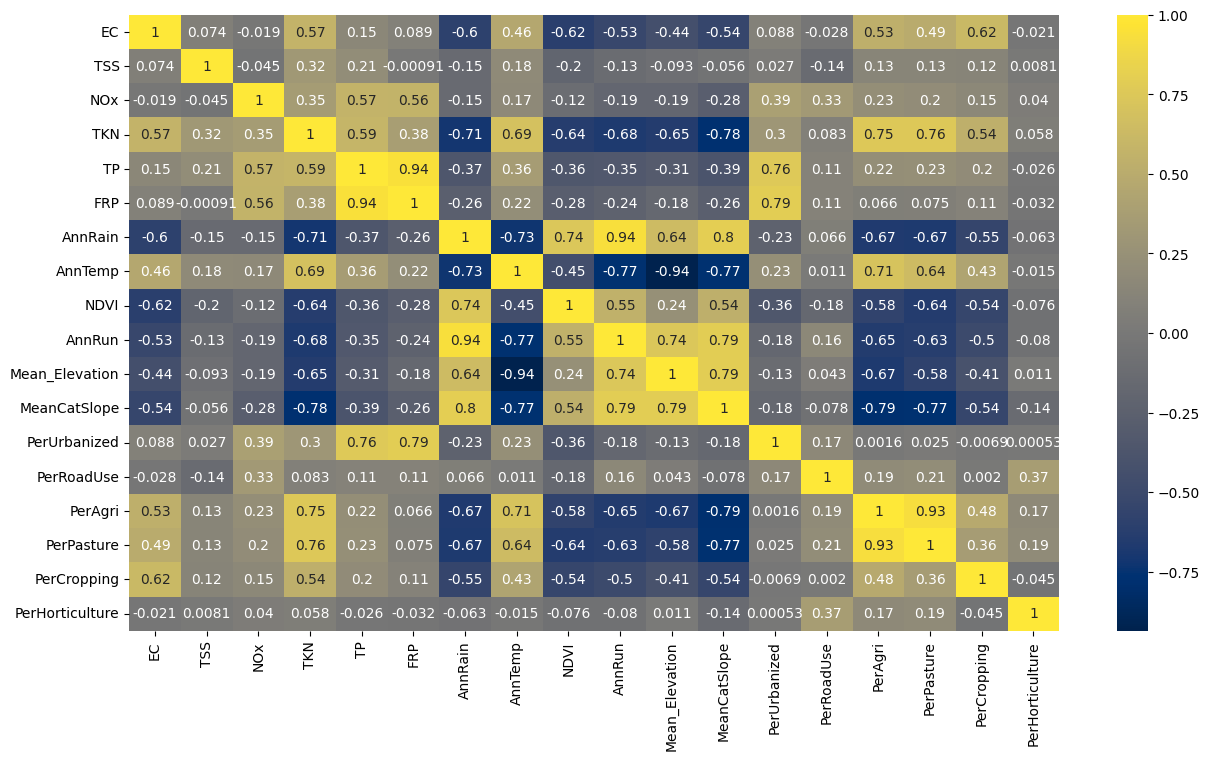

In [351]:
# plotting the correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_std.corr(),annot=True,cmap="cividis");

**The dataset can be divided into water variables and catachement varaibles.**

## 1.1. Derivation of Principal Components for Water Quality Variables 

**The first 6 columns are water variables and let apply PCA on these**

In [352]:
df_std.columns

Index(['EC', 'TSS', 'NOx', 'TKN', 'TP', 'FRP', 'AnnRain', 'AnnTemp', 'NDVI',
       'AnnRun', 'Mean_Elevation', 'MeanCatSlope', 'PerUrbanized',
       'PerRoadUse', 'PerAgri', 'PerPasture', 'PerCropping',
       'PerHorticulture'],
      dtype='object')

In [353]:
# Slicing required 6 variables(first 6 variables are water variables) and dropping coloumn with site ID
water_data = df_std.iloc[:, :6]
water_data.head()

,EC,TSS,NOx,TKN,TP,FRP
0,-0.581406,-0.681594,0.085723,-1.026327,-0.546381,-0.275553
1,-0.556819,-0.379461,-0.113674,-0.923039,-0.514362,-0.288116
2,-0.549905,-0.659857,-0.154157,-0.985470,-0.559193,-0.286029
3,-0.554824,-0.715556,-0.276089,-0.873198,-0.568026,-0.293148
4,-0.460163,0.788716,-0.450459,-0.662163,-0.329418,-0.266173


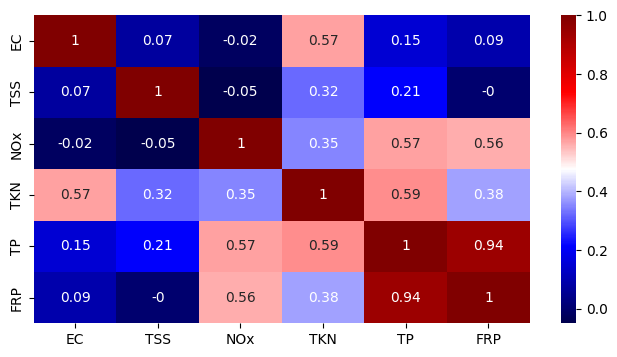

In [418]:
# plotting the correlation matrix
plt.figure(figsize=(8,4))
sns.heatmap(np.round(water_data.corr(),2),annot=True,cmap="seismic");

* We can see that `TP` and `FRP` are highly correlated
* There is a corelation between Tp and (NOx,TKN)

In [377]:
from sklearn.decomposition import PCA
pca1=PCA()
water_pca=pca1.fit_transform(water_data)

In [378]:
pca1_comp=pca1.components_
pca1_comp

array([[ 0.20922529,  0.13645398,  0.40678359,  0.4469579 ,  0.55912257,
         0.50964967],
       [ 0.61852494,  0.43634928, -0.35390856,  0.43148265, -0.14512365,
        -0.30746834],
       [-0.53085222,  0.83144142, -0.0558423 , -0.09332049,  0.12215989,
        -0.01228702],
       [-0.07101997,  0.07402206,  0.78473156,  0.2309237 , -0.32397978,
        -0.46409549],
       [-0.53019165, -0.2926663 , -0.30049842,  0.71203983,  0.07711883,
        -0.17319329],
       [ 0.07550216, -0.09247678,  0.0073867 , -0.21217011,  0.73517877,
        -0.63260487]])

In [380]:
#  Print without scientific notation
np.set_printoptions(suppress=True)
# Eigen values
ev_pca1=np.round(pca1.explained_variance_,3)
print("Eigen Values",ev_pca1)

print()

# variance
var_pca1=np.round(pca1.explained_variance_ratio_*100,2)
print("Variance ratio",var_pca1)
print()

# Cumulative variance
cum_var_pca1=np.round(np.cumsum(var_pca1),2)
print("Cumulative variance",cum_var_pca1)

Eigen Values [2.884 1.398 0.961 0.536 0.268 0.012]

Variance ratio [47.6  23.07 15.85  8.85  4.42  0.2 ]

Cumulative variance [47.6  70.67 86.52 95.37 99.79 99.99]


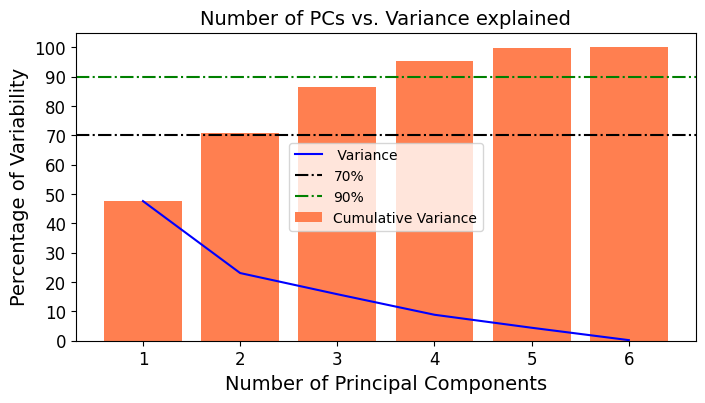

In [358]:
plt.figure(figsize = (8,4))
plt.bar(range(1, len(cum_var_pca1)+1), cum_var_pca1, color='coral',label="Cumulative Variance")
plt.plot(range(1, len(var_pca1)+1), var_pca1, label=" Variance",color="blue")
plt.axhline(y=70, c='black', linestyle='-.', lw=1.5,label="70%")
plt.axhline(y=90, c='green', linestyle='-.', lw=1.5,label="90%")
plt.xticks(list(range(1, len(cum_var_pca1)+1)), fontsize=12)
plt.yticks(fontsize=12,ticks=np.arange(0,110,10))
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Percentage of Variability', fontsize=14)
plt.title('Number of PCs vs. Variance explained', fontsize=14)
plt.legend(loc="center")
plt.show()

**From the above, we can clearly see that 4 pcs are enough to explain the cumulative variance of 90%**

In [359]:
col=["Pojected_pc-"+str(i) for i in range(1,len(cum_var_pca1)+1)]
col

['Pojected_pc-1',
 'Pojected_pc-2',
 'Pojected_pc-3',
 'Pojected_pc-4',
 'Pojected_pc-5',
 'Pojected_pc-6']

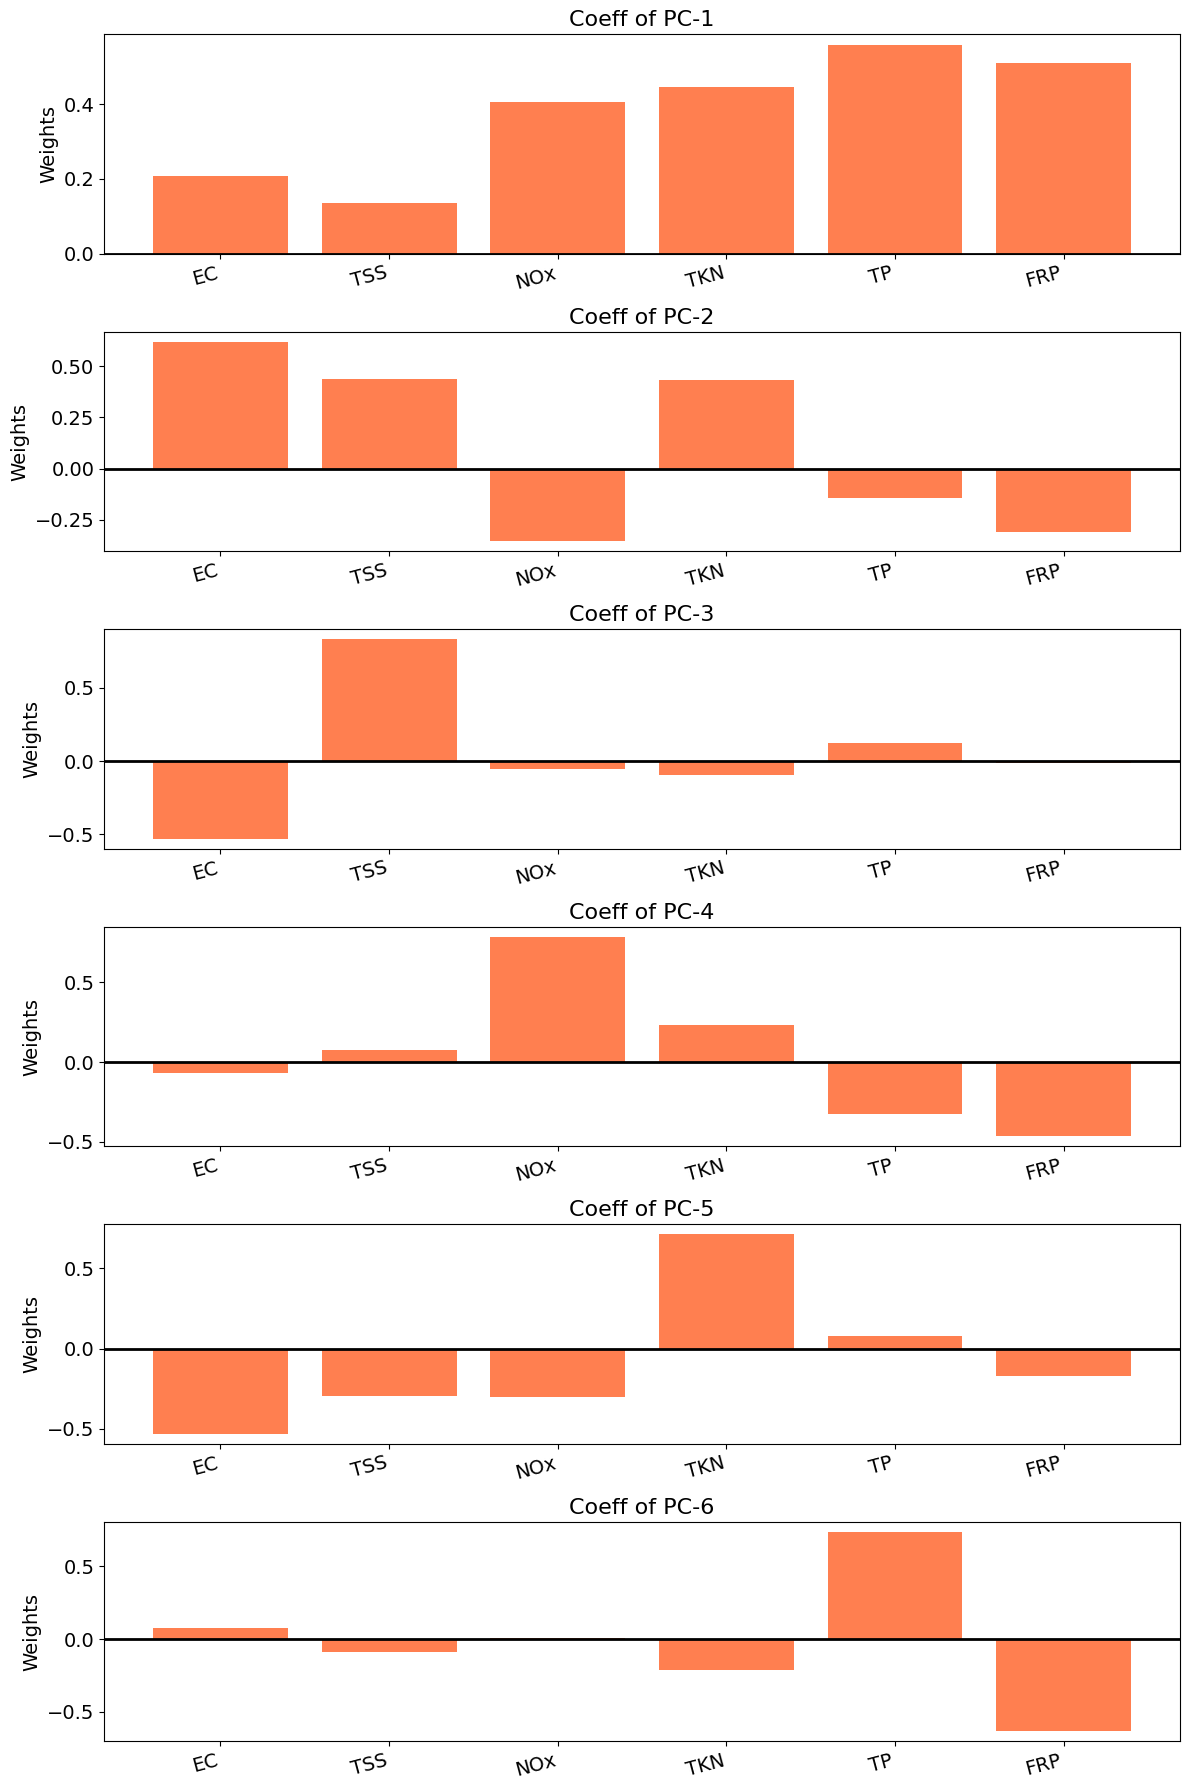

In [360]:
pc_coeff=["Coeff of PC-"+str(i) for i in range(1,len(cum_var_pca1)+1)]
fig, ax = plt.subplots(nrows=len(pc_coeff), ncols=1, figsize=(12,18))
for i, row in zip(range(len(pc_coeff)), ax): # Create subplots with rows in ax
    
    row.bar(water_data.columns, pca1_comp[i,:], color='coral')
    row.axhline(y=0, color='k', linestyle='-', lw=2)

    row.set_title(pc_coeff[i], fontsize=16)
    row.set_ylabel('Weights', fontsize=14)

    row.tick_params(axis='both', which='major', labelsize=14)
    row.set_xticklabels(water_data.columns, rotation=15, ha='right')   # Horizontal alignment- right

fig.tight_layout()
plt.show()

---
**Inference**

---
Electrical Conductivity (EC), <br>
Total Suspended Solid (TSS),<br>
Nitrate + Nitrite (NOx)<br>
Total Kjeldahl Nitrogen (TKN),<br>
Total Phosphorus (TP),<br>
Filterable Reactive Phosphorus (FRP) <br>


- TP and FRP seem to have higher coefficients in some PCs, suggesting their strong influence in those components.
- **`PC-1:`** Strongly influenced by phosphorus-related variables (`TP` and `FRP`), likely representing the general phosphorus content.
- - This might be due to `fertilizers/ agricultural runoff`

- **`PC-2:`** Captures contrasts between `EC`, `TSS`, and phosphorus variables, suggesting different environmental factors.
- - `conductivity or turbidity changes due to salts`

- **`PC-3:`** Likely captures inverse relationships between `TSS` and `TP`, with smaller contributions from other variables.
- - `mineral salts composition`

- **`PC-4:`** Reflects particulate matter (`TSS`) against other environmental variables, with small or negative contributions from dissolved substances.
- - variable use of nitrogen-rich or phosphorous-rich fertilizer
  


In [361]:
# Creating th dataframe of projected values of PC
water_pca_df=pd.DataFrame(water_pca,columns=col)

water_pca_df.head()
                 

,Pojected_pc-1,Pojected_pc-2,Pojected_pc-3,Pojected_pc-4,Pojected_pc-5,Pojected_pc-6
0,-1.084435,-0.966191,-0.230435,0.126004,-0.243222,0.010152
1,-1.061510,-0.704796,0.013281,0.009458,-0.206573,-0.007832
2,-1.166698,-0.829617,-0.220937,-0.044418,-0.164283,-0.002713
3,-1.183314,-0.761897,-0.269296,-0.111784,-0.028240,-0.024645
4,-0.787693,0.062889,0.950026,-0.185081,-0.302285,-0.044316


**Lets use the first four projected data fro further analysis**

## 2.2. Derivation of Principal Components for Catchement Characteristics.

**Analysing the Catachment variables**

In [363]:
catachment_data = df_std.iloc[:, 6:] # Slicing required 12 variables
catachment_data.head()

,AnnRain,AnnTemp,NDVI,AnnRun,Mean_Elevation,MeanCatSlope,PerUrbanized,PerRoadUse,PerAgri,PerPasture,PerCropping,PerHorticulture
0,0.940270,-1.008828,1.723229,-0.211143,0.742314,1.208013,-0.306450,-1.226933,-1.291601,-1.177861,-0.619412,-0.225157
1,0.540431,-0.051071,1.600934,-0.451840,-0.083793,0.754740,-0.295977,-1.094136,-1.246251,-1.110172,-0.619412,-0.225157
2,0.212910,-0.005811,1.349526,-0.609392,-0.121653,0.769933,-0.305700,-1.077069,-1.286965,-1.208845,-0.619412,-0.225157
3,-0.008000,-0.371540,1.224067,-0.848508,0.222513,0.692244,-0.306450,-1.233369,-1.291601,-1.221500,-0.619412,-0.225157
4,-0.587827,-1.154098,-0.275841,-0.502854,1.173057,0.907799,-0.285727,-1.018416,-0.703829,-0.360760,-0.567396,-0.225157


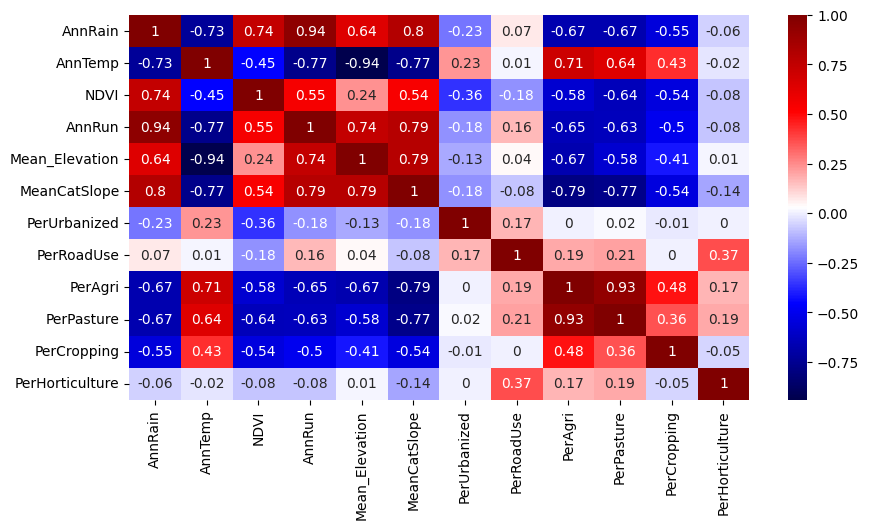

In [417]:
# plotting the correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(np.round(catachment_data.corr(),2),annot=True,cmap="seismic");

**The heatmap of coreation matrix shows us the linear dependancies in the catachment variables and using PCA the dimensionality can be reduced**

In [375]:
from sklearn.decomposition import PCA
pca2=PCA()
catachment_pca=pca2.fit_transform(catachment_data)

In [379]:
pca2_comp=pca2.components_
pca2_comp

array([[ 0.36184513, -0.34815391,  0.28097832,  0.35384194,  0.32505637,
         0.36667744, -0.08518757, -0.0296839 , -0.34788901, -0.33518656,
        -0.24501703, -0.04518669],
       [ 0.08392434, -0.13680176, -0.19060656,  0.16782454,  0.19673887,
        -0.00502385,  0.14793926,  0.67768495,  0.13430488,  0.19236898,
        -0.09700045,  0.57045507],
       [-0.14946149, -0.01345907, -0.36761708, -0.04089829,  0.15038527,
         0.07152168,  0.80377976,  0.02257905, -0.2510178 , -0.20565361,
         0.02519382, -0.24581345],
       [-0.11074356, -0.33641206, -0.45839047,  0.05382586,  0.43162921,
         0.09758708, -0.34711883, -0.06958347,  0.05925137,  0.07619963,
         0.55436989, -0.15407888],
       [-0.26697442, -0.15590056, -0.03814537, -0.32696641,  0.1509194 ,
        -0.00425895,  0.01275479, -0.48353112, -0.19363408, -0.15177436,
        -0.08477322,  0.68671801],
       [ 0.08459561,  0.11841402,  0.24548785, -0.00298357, -0.24465113,
        -0.07088687,  

In [381]:
#  Print without scientific notation
np.set_printoptions(suppress=True)
# Eigen values
ev_pca2=np.round(pca2.explained_variance_,3)
print("Eigen Values",ev_pca2)

print()

# variance
var_pca2=np.round(pca2.explained_variance_ratio_*100,2)
print("Variance ratio",var_pca2)
print()

# Cumulative variance
cum_var_pca2=np.round(np.cumsum(var_pca2),2)
print("Cumulative variance",cum_var_pca2)

Eigen Values [6.34  1.568 1.182 0.963 0.736 0.601 0.304 0.213 0.121 0.047 0.026 0.019]

Variance ratio [52.31 12.94  9.75  7.95  6.07  4.96  2.51  1.75  1.    0.38  0.22  0.16]

Cumulative variance [ 52.31  65.25  75.    82.95  89.02  93.98  96.49  98.24  99.24  99.62
  99.84 100.  ]


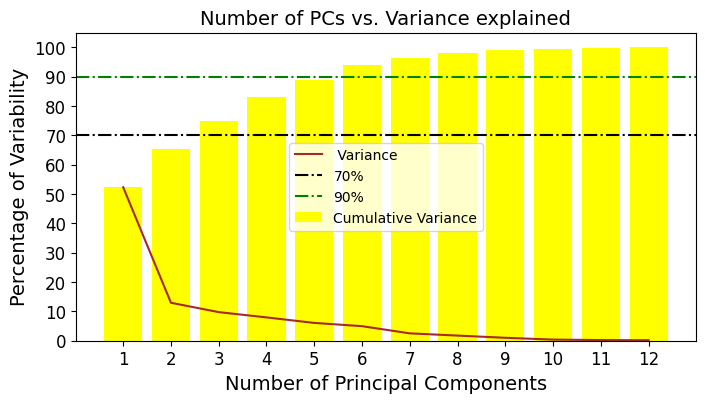

In [400]:
plt.figure(figsize = (8,4))
plt.bar(range(1, len(cum_var_pca2)+1), cum_var_pca2, color='yellow',label="Cumulative Variance")
plt.plot(range(1, len(var_pca2)+1), var_pca2, label=" Variance",color="brown")
plt.axhline(y=70, c='black', linestyle='-.', lw=1.5,label="70%")
plt.axhline(y=90, c='green', linestyle='-.', lw=1.5,label="90%")
plt.xticks(list(range(1, len(cum_var_pca2)+1)), fontsize=12)
plt.yticks(fontsize=12,ticks=np.arange(0,110,10))
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Percentage of Variability', fontsize=14)
plt.title('Number of PCs vs. Variance explained', fontsize=14)
plt.legend(loc="center")
plt.show()

**6 PCs are required to explain the 90% varaince**

In [403]:
col=["Pojected_PC-"+str(i) for i in range(7,6+len(cum_var_pca2)+1)]
col

['Pojected_PC-7',
 'Pojected_PC-8',
 'Pojected_PC-9',
 'Pojected_PC-10',
 'Pojected_PC-11',
 'Pojected_PC-12',
 'Pojected_PC-13',
 'Pojected_PC-14',
 'Pojected_PC-15',
 'Pojected_PC-16',
 'Pojected_PC-17',
 'Pojected_PC-18']

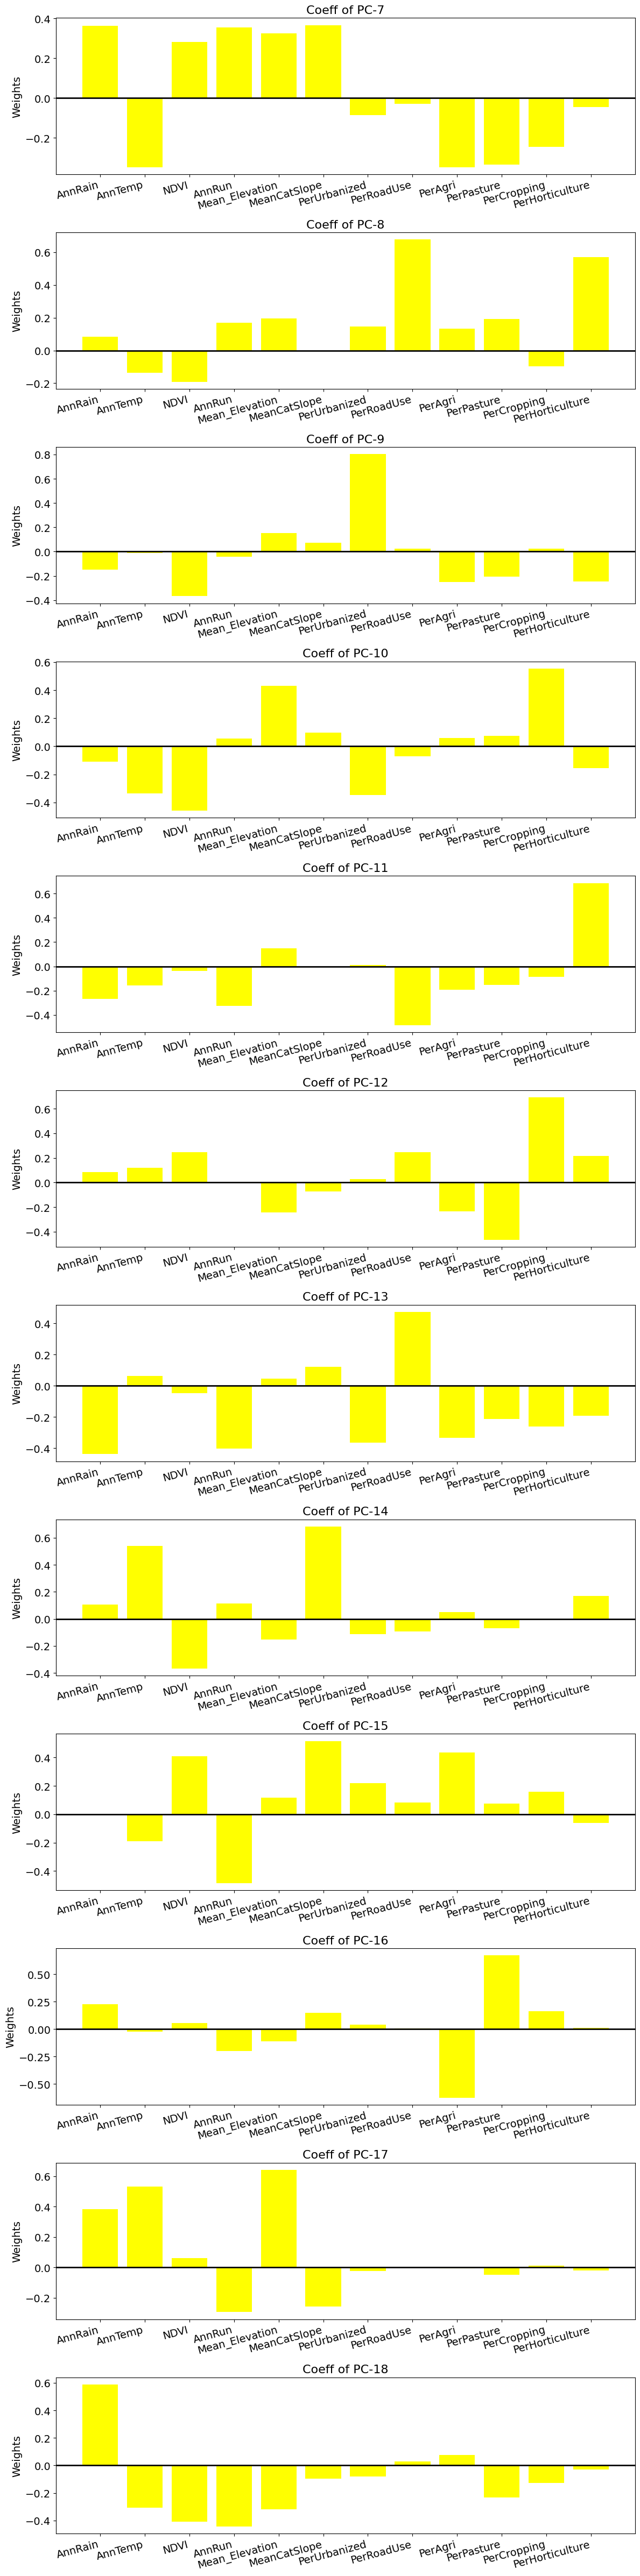

In [404]:
pc_coeff=["Coeff of PC-"+str(i+6) for i in range(1,len(cum_var_pca2)+1)]
fig, ax = plt.subplots(nrows=len(pc_coeff), ncols=1, figsize=(12,48))
for i, row in zip(range(len(pc_coeff)), ax): # Create subplots with rows in ax
    
    row.bar(catachment_data.columns, pca2_comp[i,:], color='yellow')
    row.axhline(y=0, color='k', linestyle='-', lw=2)

    row.set_title(pc_coeff[i], fontsize=16)
    row.set_ylabel('Weights', fontsize=14)

    row.tick_params(axis='both', which='major', labelsize=14)
    row.set_xticklabels(catachment_data.columns, rotation=15, ha='right')   # Horizontal alignment- right
    


fig.tight_layout()
plt.show()

***Inference from Subplots:***

These subplots show how the original variables contribute to each principal component (PC). Each PC captures different aspects of variability in the dataset, with PCs 7-12 highlighting **land use and agricultural factors**, while PCs 13-18 focus more on **vegetation**, **elevation**, and **urbanization**.


***Clusters of variables contributing to the chosen PCs***

---

**PC7 Cluster**:
- **Variables**: AnnRain, AnnTemp, NDVI, AnnRun, Mean_Elevation
- **Interpretation**: PC7 primarily reflects **annual rainfall (AnnRain)**, **temperature (AnnTemp)**, **vegetation cover (NDVI)**, and **runoff (AnnRun)** along with **elevation**. This suggests a relationship between **climatic conditions (rain and temperature)** and **vegetation health (NDVI)**, with **topographic factors (elevation)** influencing runoff patterns.

**PC8 Cluster**:
- **Variables**: PerRoadUse, PerHorticulture
- **Interpretation**: Variables related to **urbanization (PerRoadUse)** and **horticulture** dominate PC8. This PC likely captures the variability due to **land use changes** involving roads and horticulture.

**PC9 Cluster**:
- **Variables**: PerRoadUse, PerHorticulture
- **Interpretation**: PC9 is driven by **road usage and horticulture** but in a slightly different pattern than PC8, indicating additional variation related to urbanization and specific land use for horticulture.

**PC10 Cluster**:
- **Variables**: NDVI, AnnRun, Mean_Elevation
- **Interpretation**: This cluster focuses on **NDVI and elevation**, suggesting some interplay between **vegetation cover** and **runoff** that wasn't fully captured in PC7.

**PC11 Cluster**:
- **Variables**: PerCropping, PerHorticulture
- **Interpretation**: PC11 shows a distinct influence of **cropping** and **horticulture**, indicating **agricultural land use** and its variability.

**PC12 Cluster**:
- **Variables**: PerCropping, PerHorticulture
- **Interpretation**: Similar to PC11, PC12 is also influenced by **cropping** and **horticulture**, showing the impact of **agricultural practices** on the variability in this PC.

**PC13 Cluster**:
- **Variables**: PerRoadUse, PerHorticulture
- **Interpretation**: PC13 shows the dominance of **urbanization** and **horticulture** again, with emphasis on the road use and land use for horticultural activities.

**PC14 Cluster**:
- **Variables**: PerCropping, PerHorticulture
- **Interpretation**: PC14 emphasizes **cropping** and **horticulture**, reinforcing the importance of **agricultural land use** in this principal component.

**PC15 Cluster**:
- **Variables**: PerRoadUse, PerUrbanized
- **Interpretation**: PC15 is heavily influenced by **urbanization** and **road usage**, which suggest its focus on land-use change related to urban expansion and infrastructure development.

**PC16 Cluster**:
- **Variables**: NDVI, AnnRun, Mean_Elevation
- **Interpretation**: This PC reflects **vegetation (NDVI)** and **elevation** data, showing how vegetation cover and runoff are related in the landscape.

**PC17 Cluster**:
- **Variables**: AnnTemp, Mean_Elevation, PerUrbanized
- **Interpretation**: PC17 highlights **temperature**, **elevation**, and **urbanization**, likely representing climatic and topographical influences on urban areas.

**PC18 Cluster**:
- **Variables**: AnnRain, AnnTemp, NDVI
- **Interpretation**: PC18 shows a mix of **rainfall**, **temperature**, and **vegetation** as contributing factors, possibly related to **seasonality** and environmental conditions across regions.

---



In [405]:
# Creating th dataframe of projected values of PC
catachment_pca_df=pd.DataFrame(catachment_pca,columns=col)

catachment_pca_df.head()
                 

,Pojected_PC-7,Pojected_PC-8,Pojected_PC-9,Pojected_PC-10,Pojected_PC-11,Pojected_PC-12,Pojected_PC-13,Pojected_PC-14,Pojected_PC-15,Pojected_PC-16,Pojected_PC-17,Pojected_PC-18
0,2.853787,-1.352221,-0.221611,-0.410957,0.932546,0.179997,0.126024,-0.259431,0.793963,0.364374,0.228861,0.155411
1,1.778094,-1.583478,-0.290480,-1.051612,0.767465,0.455282,0.403667,0.031858,0.387568,0.337729,0.230334,0.079664
2,1.558259,-1.617525,-0.124797,-0.946407,0.917658,0.439089,0.672242,0.117331,0.331617,0.245069,0.136496,0.077277
3,1.579738,-1.643238,0.014879,-0.603400,1.247278,0.237023,0.784314,-0.173991,0.451000,0.188110,0.160912,0.113135
4,1.217387,-0.666805,0.505959,0.968640,1.258280,-0.969385,0.689873,-0.114824,0.399631,0.064869,-0.162760,-0.012335


## 1.3. Analysis of Water Quality  Catchment Characteristics using PCs 

In [406]:
# lets combine bot the data
Projected_data=pd.concat([water_pca_df.iloc[:,:4],catachment_pca_df.iloc[:,:6]],axis=1)

In [407]:
Projected_data

,Pojected_pc-1,Pojected_pc-2,Pojected_pc-3,Pojected_pc-4,Pojected_PC-7,Pojected_PC-8,Pojected_PC-9,Pojected_PC-10,Pojected_PC-11,Pojected_PC-12
0,-1.084435,-0.966191,-0.230435,0.126004,2.853787,-1.352221,-0.221611,-0.410957,0.932546,0.179997
1,-1.061510,-0.704796,0.013281,0.009458,1.778094,-1.583478,-0.290480,-1.051612,0.767465,0.455282
2,-1.166698,-0.829617,-0.220937,-0.044418,1.558259,-1.617525,-0.124797,-0.946407,0.917658,0.439089
3,-1.183314,-0.761897,-0.269296,-0.111784,1.579738,-1.643238,0.014879,-0.603400,1.247278,0.237023
4,-0.787693,0.062889,0.950026,-0.185081,1.217387,-0.666805,0.505959,0.968640,1.258280,-0.969385
...,...,...,...,...,...,...,...,...,...,...
97,9.968866,-2.837744,0.612783,-3.600137,-2.894345,0.138048,8.393022,-3.406667,1.142544,0.061317
98,1.994288,4.785698,-1.534034,-0.038799,-3.868246,-0.712156,0.645643,1.271600,0.509788,0.127628
99,0.175166,1.023278,0.185938,0.091089,-3.408697,-0.155123,0.434586,1.315517,-0.182094,0.837861
100,0.047916,1.204922,-0.051769,0.044388,-3.217948,0.393313,0.047872,0.766198,-0.302524,-0.528764


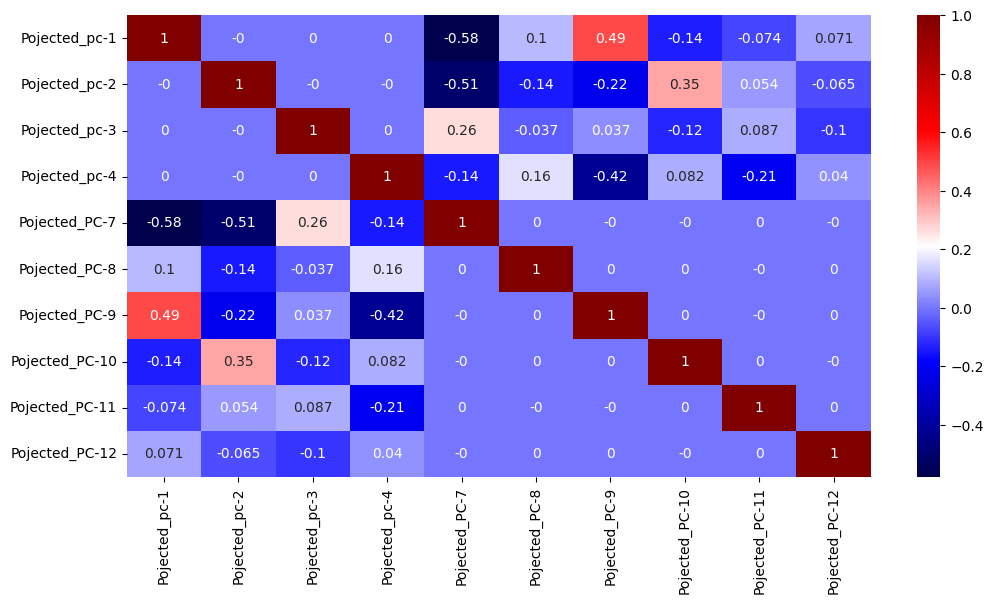

In [419]:
# plotting the correlation matrix for the projected data
plt.figure(figsize=(12,6))
sns.heatmap(np.round(Projected_data.corr(),3),annot=True,cmap="seismic");

**The data is ready for machine learing algorithm**